# Part 4: Geospatial Analysis

Create a Rest API that given a latitude and longitude returns the 10 closest properties.


In [2]:
import sys
import csv
import pandas as pd
import MySQLdb as sql
import sys
import requests

To use the API append to the URL http://localhost:5000/api/neighbors the values for latitude and longitude in the format shown below.

In [3]:
url = 'http://localhost:5000/api/neighbors?latitude=34.449407&longitude=-119.254052'
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.json()

{'data': [['17054981', 34.4494, -119.254, 0.0001022817989503627],
  ['17054972', 34.4498, -119.257, 0.15077211757463838],
  ['17054563', 34.4503, -119.258, 0.25012118688982],
  ['17055019', 34.4465, -119.251, 0.26475130060853685],
  ['17055022', 34.447, -119.25, 0.2688314855761506],
  ['17055403', 34.4493, -119.249, 0.29073561558441163],
  ['17054912', 34.4531, -119.25, 0.3414510016695234],
  ['17054918', 34.4525, -119.249, 0.3567914575873358],
  ['17055183', 34.4516, -119.248, 0.3600599675225327],
  ['17055267', 34.4505, -119.248, 0.3661189485463627]]}

In [6]:
import pandas as pd
j = response.json()
df = pd.DataFrame(j['data'], columns=['ParcelID','Latitude','Longitude','Distance'])

In [7]:
df

,ParcelID,Latitude,Longitude,Distance
0,17054981,34.4494,-119.254,0.000102
1,17054972,34.4498,-119.257,0.150772
2,17054563,34.4503,-119.258,0.250121
3,17055019,34.4465,-119.251,0.264751
4,17055022,34.4470,-119.250,0.268831
5,17055403,34.4493,-119.249,0.290736
6,17054912,34.4531,-119.250,0.341451
7,17054918,34.4525,-119.249,0.356791
8,17055183,34.4516,-119.248,0.360060
9,17055267,34.4505,-119.248,0.366119


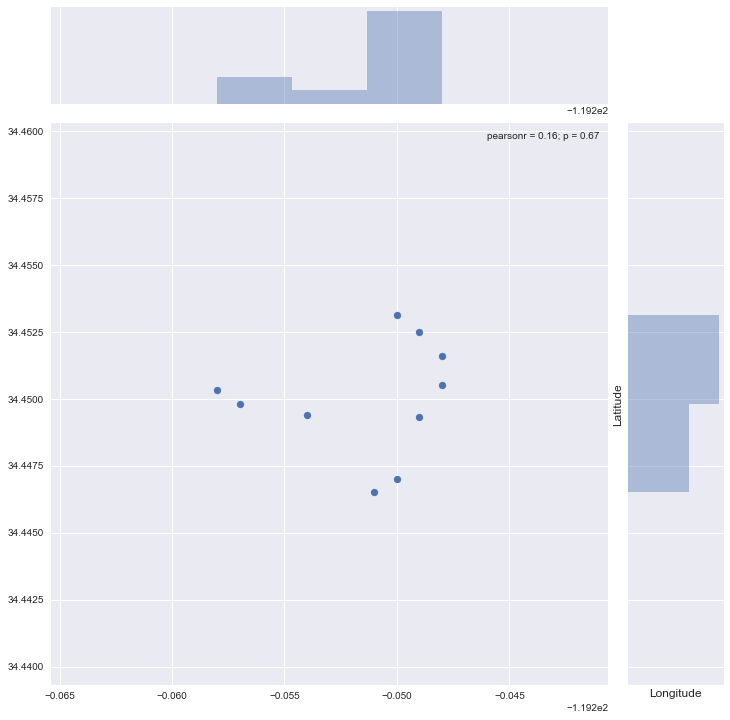

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.close('all')
sns.set()
plt.figure(figsize=(12,12))
sns.jointplot(x=df.Longitude.values,y=df.Latitude.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


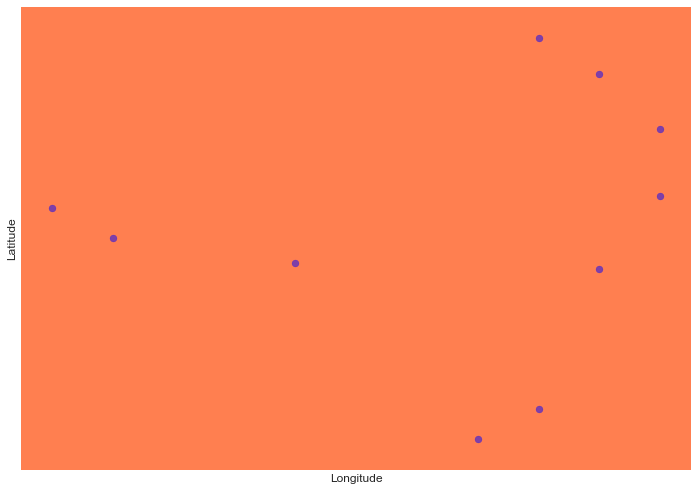

In [10]:
from mpl_toolkits.basemap import Basemap
plt.close('all')
plt.figure(figsize=(12,12))

m = Basemap(llcrnrlon=df['Longitude'].min()-.0005,llcrnrlat=df['Latitude'].min()-.0005,
            urcrnrlon=df['Longitude'].max()+.0005,urcrnrlat=df['Latitude'].max()+.0005)
#m.shadedrelief()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines(color='#555566', linewidth=1)
m.scatter(df['Longitude'],df['Latitude'],
            c='blue',alpha=0.5, zorder=10)

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [8]:
df.to_csv('result.csv', index=False)